# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from matplotlib_venn import venn3
from scipy import signal

# Data simulation

## Simulation parameters for three different stimuli

In [2]:
nglm = 64                                     # number of simulated glomeruli (neural population)
pact_glm = .5                                 # prob. of a glomeruli to respond to a given stimulus
p2way_olp = .4                                # prob. of two stimuli to activate the same glomeruli
p3way_olp = .10                               # prob. of three stimuli to activate the same glomeruli
nact_glm = int(nglm*pact_glm) 
glm_list = random.sample(range(nglm), nglm)
n2way_olp = int(p2way_olp*nact_glm)
n3way_olp = int(p3way_olp*nact_glm)

In [3]:
glm_od1 = random.sample(range(nglm), nact_glm)
glm_list = [x for x in glm_list if x not in glm_od1]

In [4]:
glm_od2 =  glm_od1[0:n2way_olp] + glm_list[0:(nact_glm-n2way_olp)] 
glm_list = [x for x in glm_list if x not in glm_od2]

In [5]:
glm_od12 = [x for x in glm_od1 if x in glm_od2]
glm_od1 = glm_od1[::-1]
glm_od2 = glm_od2[::-1]

In [6]:
glm_od3 = (glm_od12[0:n3way_olp] + 
           glm_od1[0:(n2way_olp-n3way_olp)] + 
           glm_od2[0:(n2way_olp-n3way_olp)] + 
           glm_list[0:(nact_glm-(2*n2way_olp)+n3way_olp)])

In [7]:
glm_od13 = [x for x in glm_od1 if x in glm_od3]
glm_od23 = [x for x in glm_od2 if x in glm_od3]
glm_od123 = [x for x in glm_od23 if x in glm_od13]

In [8]:
glm_sets =([ glm_od1,
       glm_od2,
       glm_od12,
       glm_od3,
       glm_od13, 
       glm_od23,
       glm_od123])
nglm_sets = list(map(len, glm_sets))

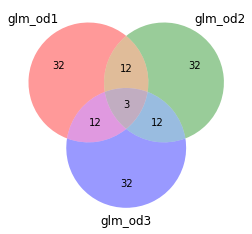

In [9]:
v=venn3(subsets = nglm_sets, set_labels = ('glm_od1', 'glm_od2', 'glm_od3'))

In [10]:
print(('Number of active glomeruli : '+
       str(len(glm_od1) + len(glm_od2) + len(glm_od3) 
           - len(glm_od12) - len(glm_od23) - len(glm_od23) + len(glm_od123))))

Number of active glomeruli : 63


## Simulation of neural responses

In [43]:
nTr = 10
t = 400
rng = np.array(range(t))

In [44]:
def sim_neural_resp(nTr, t, glm_od, nglm, offset=7, decay=.95, spread=50, jitter_lvl=4, amp_noise =.2):
    rng = np.array(range(t))
    resp_od = np.zeros((nglm, t, nTr))
    
    for tr in range(nTr):
        offseti = 10
        decayi = 1
        
        for glm in range(len(glm_od)):
            glm_idx = glm_od[glm]
            jitter = random.sample(range(jitter_lvl), 1)[0] # set to 0 for noiseless simulation
            t_start = offseti+jitter
            t_end = offseti+jitter+spread
            amplitude_noise = 1+(random.uniform(1-amp_noise, 1+amp_noise)/10) # set to 1 for noiseless simulation
            resp_od[glm_idx, t_start:t_end, tr] = signal.gaussian(spread, std=spread/5) * decayi * amplitude_noise

            offseti += offset
            decayi *= decay
            
    return resp_od

In [45]:
resp_od1 = sim_neural_resp(nTr, t, glm_od1, nglm, offset=7, decay=.95, spread=70, jitter_lvl=3, amp_noise =.1)
resp_od2 = sim_neural_resp(nTr, t, glm_od2, nglm, offset=7, decay=.95, spread=70, jitter_lvl=3, amp_noise =.1)
resp_od3 = sim_neural_resp(nTr, t, glm_od3, nglm, offset=7, decay=.95, spread=70, jitter_lvl=3, amp_noise =.1)

In [46]:
import scipy.io

scipy.io.savemat('/Users/pedroherrero/resp_od1.mat', mdict={'resp_od1': resp_od1})
scipy.io.savemat('/Users/pedroherrero/resp_od2.mat', mdict={'resp_od2': resp_od2})
scipy.io.savemat('/Users/pedroherrero/resp_od3.mat', mdict={'resp_od3': resp_od3})

/Users/pedroherrero/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


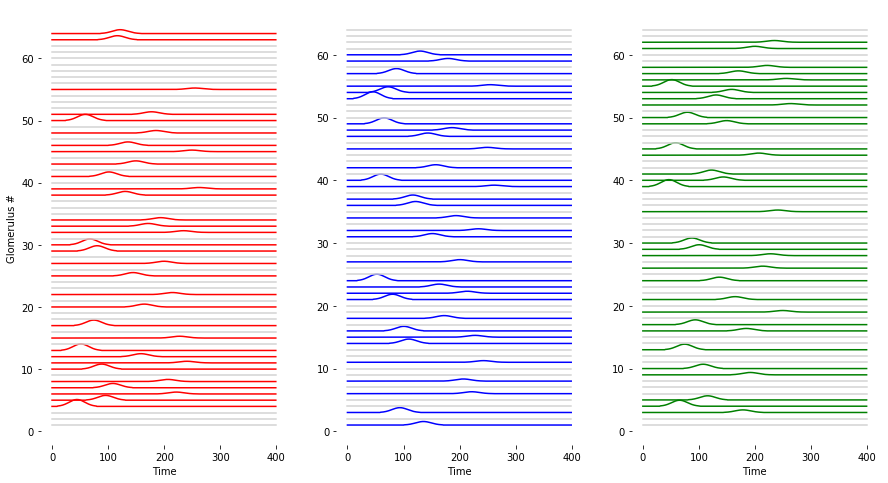

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', figsize=(15,8))
offset = 1
for glm in range(nglm):
    ax1 = plt.subplot(1,3,1)
    if glm in glm_od1:
        ax1.plot(rng, resp_od1[glm, :, 1]+offset, c='r')
        offset += 1
    elif glm not in glm_od1:
        ax1.plot(rng, resp_od1[glm, :, 1]+offset, c='lightgrey')
        offset += 1

ax1 = plt.ylabel('Glomerulus #')
ax1 = plt.yticks(np.arange(0, nglm, 10)) 
ax1 = plt.xlabel('Time')
ax1 = plt.box(False)        
        
offset = 1
for glm in range(nglm):
    ax2 = plt.subplot(1,3,2)
    if glm in glm_od2:
        ax2.plot(rng, resp_od2[glm, :, 1]+offset, c='b')
        offset += 1
    elif glm not in glm_od2:
        ax2.plot(rng, resp_od2[glm, :, 1]+offset, c='lightgrey')
        offset += 1

ax2 = plt.yticks(np.arange(0, nglm, 10)) 
ax2 = plt.xlabel('Time')
ax2 = plt.box(False)        

offset = 1
for glm in range(nglm):
    ax3 = plt.subplot(1,3,3)
    if glm in glm_od3:
        ax3.plot(rng, resp_od3[glm, :, 1]+offset, c='g')
        offset += 1
    elif glm not in glm_od3:
        ax3.plot(rng, resp_od3[glm, :, 1]+offset, c='lightgrey')
        offset += 1
        
ax3 = plt.yticks(np.arange(0, nglm, 10)) 
ax3 = plt.xlabel('Time')
ax3 = plt.box(False)

In [48]:
marg_resp_od1 = np.reshape(resp_od1, (nglm,t*nTr), order='F').T
marg_resp_od2 = np.reshape(resp_od2, (nglm,t*nTr), order='F').T
marg_resp_od3 = np.reshape(resp_od3, (nglm,t*nTr), order='F').T

X = np.concatenate((marg_resp_od1, marg_resp_od2, marg_resp_od3), axis=0) 

# Manifold representation: PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=nglm)
pca.fit(X)
Y = pca.transform(X)

In [17]:
pca_resp = np.reshape(Y.T, (nglm, t, nTr, 3), order='F')
avg_pca_resp = np.mean(pca_resp, axis=2)

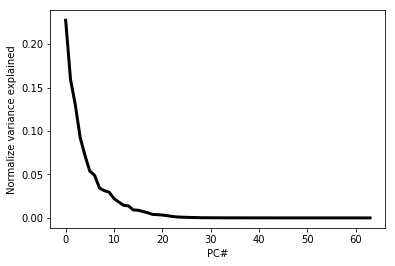

In [18]:
eigenvalues = pca.explained_variance_ratio_
PCA_plot = plt.plot(eigenvalues, c='k', lw= 3)
PCA_plot = plt.xlabel('PC#')
PCA_plot = plt.ylabel('Normalize variance explained')

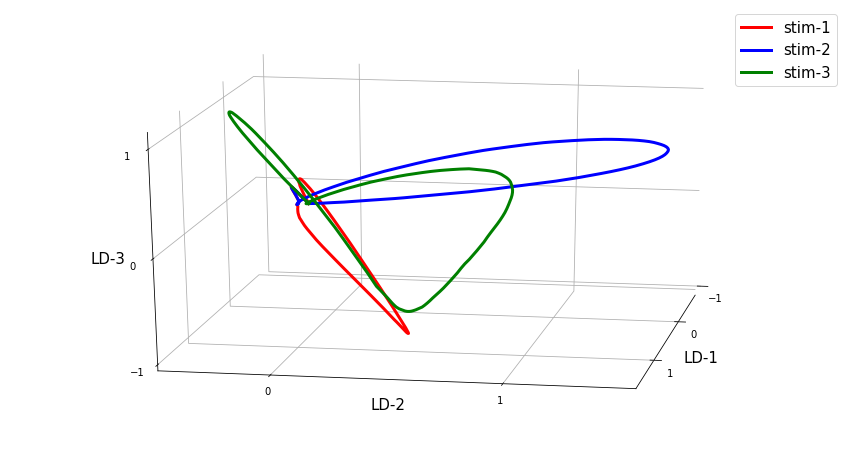

In [19]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.plot3D(avg_pca_resp[0, :, 0],avg_pca_resp[1, :, 0], avg_pca_resp[2, :, 0], c='r', lw= 3)
ax.plot3D(avg_pca_resp[0, :, 1],avg_pca_resp[1, :, 1], avg_pca_resp[2, :, 1], c='b', lw= 3)
ax.plot3D(avg_pca_resp[0, :, 2],avg_pca_resp[1, :, 2], avg_pca_resp[2, :, 2], c='g', lw= 3)
# ax.grid(False)
ax.set_xlabel('LD-1', fontsize=15)
ax.set_xticks([-1, 0, 1])
ax.set_ylabel('LD-2', fontsize=15)
ax.set_yticks([0, 1])
ax.set_zlabel('LD-3', fontsize=15)
ax.set_zticks([-1, 0, 1])
ax.view_init(20, 10)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.legend(('stim-1', 'stim-2', 'stim-3'), fontsize=15);

# Manifold representation: FA

In [20]:
def FA_EM(X_cov, xDim, zDim, eps, T, penalty=3):
    A = abs(np.random.uniform(0,1, (xDim,zDim))/np.sqrt(zDim))  # initiate A
    R = np.diag(np.diag(X_cov))                                 # initiate R

    # eps = 1e-7                                                # define stopping value
    LL_prev = 0                                                 # initiate LL reference
    LL_step = eps+1                                             # non-stop value for while loop
    LL_cache = []                                               # array with LL values
    counter = 0 
    while LL_step > eps:                                        # EM FA
        # E-step
        delta = np.linalg.pinv(A @ A.T + R)
        beta = A.T @ delta

        # M-step
        A = (X_cov @ beta.T @ 
             np.linalg.pinv(np.identity(zDim) - beta @ A + beta @ X_cov @ beta.T))
        R = np.diag(np.diag(X_cov - A @ beta @ X_cov))

        # avg. LL
        if np.linalg.slogdet(delta)[0] > 0:
            LL = -T/2*np.trace(delta @ X_cov) + T/2*np.linalg.slogdet(delta)[1] - T*xDim/2*np.log(2*np.pi) 
                                            # N*sum(log(diag(chol(MM))))
        elif np.linalg.slogdet(delta)[0] < 0:
#             print(str(zDim)+'Negative determinant')
            LL = -T/2*np.trace(delta @ X_cov) + T/2*np.linalg.slogdet(delta)[1] - T*xDim/2*np.log(2*np.pi) 
                                                                
        LL_step = abs((LL-LL_prev)/abs(LL))
        LL_prev = LL
        LL_cache.append(LL)
        counter += 1
        if counter > 1e4:
            break

    LL_corrected = LL - zDim ** penalty;

    return A, R, LL_cache, LL_corrected

In [21]:
X_mu = np.mean(X.T, axis=1);              # data mean
X_cov = np.cov(X.T)                       # data covariance
xDim = len(X_mu);                                       # observation space dimensions
if np.linalg.det(X_cov) < 1e-7:
    print('Warning! The determinant the covariance matrix is quite low')
if np.linalg.matrix_rank(X.T) < X.shape[1]:
    print('Warning! Data matrix is not full rank')

Warning! The determinant the covariance matrix is quite low
Warning! Data matrix is not full rank


In [22]:
zDims = np.arange(29)+2                 # latent space dimensions
eps = 1e-4                              # define stopping value
LL_dim = []                             # max LL per dim

In [23]:
A = []
R = []
LL_cache = []
LL_corrected = []

for zDim in zDims:
    tA, tR, tLL_cache, tLL_corrected = FA_EM(X_cov, xDim, zDim, eps, X.shape[0])
    A.append(tA)
    R.append(tR)
    LL_cache.append(tLL_cache)
    LL_corrected.append(tLL_corrected)

In [56]:
rzDim = 1#np.argmax(LL_corrected)
Re = R[rzDim]
Ae = A[rzDim]
z = Ae.T @ np.linalg.pinv(Ae @ Ae.T + Re) @ (X.T - np.tile(X_mu, (X.shape[0], 1)).T)
print('Number of latent dimensions: '+str(rzDim+2))

Number of latent dimensions: 3


In [57]:
z_resp = np.reshape(z, (rzDim+2, t, nTr, 3), order='F')
avg_z_resp = np.mean(z_resp, axis=2)

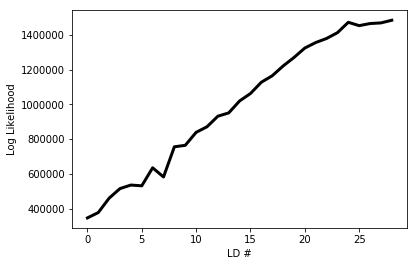

In [58]:
LLDim_plot = plt.plot(LL_corrected, c='k', lw=3)
LLDim_plot = plt.xlabel('LD #')
LLDim_plot = plt.ylabel('Log Likelihood')

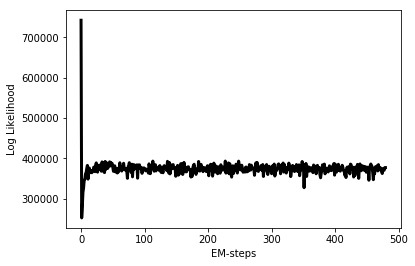

In [59]:
LL_plot = plt.plot(LL_cache[rzDim], c='k', lw=3)
LL_plot = plt.xlabel('EM-steps')
LL_plot = plt.ylabel('Log Likelihood')

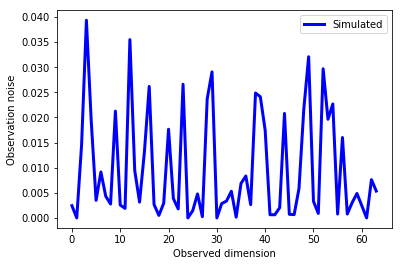

In [60]:
# R_plot = plt.plot(np.arange(len(R_true)), np.diag(R_true), c='r', lw=3)
R_plot = plt.plot(np.arange(len(R[rzDim])), np.diag(R[rzDim]), c='b', lw=3)
R_plot = plt.xlabel('Observed dimension')
R_plot = plt.ylabel('Observation noise')
R_plot = plt.legend(('Simulated', 'Reconstructed'))

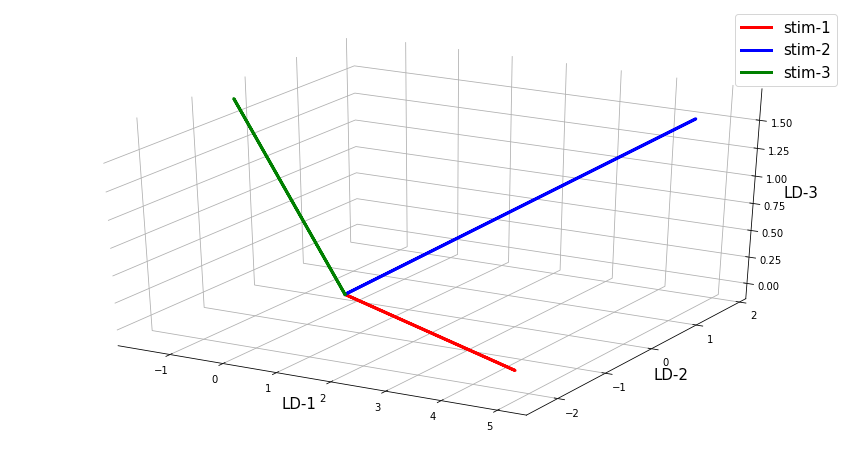

In [61]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.plot3D(avg_z_resp[0, :, 0],avg_z_resp[1, :, 0], avg_z_resp[2, :, 0], c='r', lw= 3)
ax.plot3D(avg_z_resp[0, :, 1],avg_z_resp[1, :, 1], avg_z_resp[2, :, 1], c='b', lw= 3)
ax.plot3D(avg_z_resp[0, :, 2],avg_z_resp[1, :, 2], avg_z_resp[2, :, 2], c='g', lw= 3)
# ax.grid(False)
ax.set_xlabel('LD-1', fontsize=15)
# ax.set_xticks([-1, 0, 1])
ax.set_ylabel('LD-2', fontsize=15)
# ax.set_yticks([0, 1])
ax.set_zlabel('LD-3', fontsize=15)
# ax.set_zticks([-1, 0, 1])
# ax.view_init(20, 10)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.legend(('stim-1', 'stim-2', 'stim-3'), fontsize=15);

In [ ]:
# add independent gaussian noise into the observed space

# Deep Bio-electronic nose

In [1]:
import torch
import torchvision
from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.image as img
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
from torch.autograd import Variable
import numpy
import time
import datetime
from torch.utils.data.sampler import *
import sys
import argparse

In [ ]:
## set device
torch.manual_seed(147)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
## set training parameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = combined()
model.to(device